In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import precision_recall_curve, average_precision_score, precision_score, recall_score, f1_score, accuracy_score, auc, roc_curve

### Held-Out Evaluation

In [2]:
predict = pd.read_csv('predict/data_v7/cnn_def/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)
predict_ent = pd.read_csv('predict/data_v7/cnn_defent/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)
predict_base = pd.read_csv('predict/data_v7/cnn_nodef/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)
predict_pcnn_ent = pd.read_csv('predict/data_v7/pcnn_defent/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)
predict_pcnn_att = pd.read_csv('predict/data_v5/pcnn_att/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)
predict_pcnn_nodef = pd.read_csv('predict/data_v7/pcnn_nodef/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)

In [3]:
def get_pred(dist, thres):
    if dist <= thres:
        return 0
    else:
        return 1

def get_prec_recall(gold, dist):
#     thres = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 1, 1.25, 1.5, 1.75, 2,
#              2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5, 5.25, 5.5, 7.75, 6,
#              6.25, 6.5, 6.75, 7, 7.25, 7.5, 7.75, 8, 8.25, 8.5, 8.75, 9, 9.25, 9.5, 9.75, 10]
    
#     thres = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5,
#              5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9]

    thres = []
    num = 0
    for i in range(100):
        num = round(num + 0.1, 1)
        thres.append(num)
    
    prec = [1]
    rec = [0]
    for t in thres:
        pred = [get_pred(d, t) for d in dist]
        prec.append(precision_score(gold, pred, pos_label=0, average='binary'))
        rec.append(recall_score(gold, pred, pos_label=0, average='binary'))
    return prec, rec, thres

In [4]:
# Calculate model performance
label = np.array(predict['label'], dtype=int)
label_scores = np.array(predict['dist'])
# precision, recall, thresholds = precision_recall_curve(label, label_scores)
precision, recall, thresholds = get_prec_recall(label, label_scores)

label_ent = np.array(predict_ent['label'], dtype=int)
label_scores_ent = np.array(predict_ent['dist'])
# precision_ent, recall_ent, thresholds_ent = precision_recall_curve(label_ent, label_scores_ent)
precision_ent, recall_ent, thresholds_ent = get_prec_recall(label_ent, label_scores_ent)

label_pcnn_ent = np.array(predict_pcnn_ent['label'], dtype=int)
label_scores_pcnn_ent = np.array(predict_pcnn_ent['dist'])
# precision_pcnn_ent, recall_pcnn_ent, thresholds_pcnn_ent = precision_recall_curve(label_pcnn_ent, label_scores_pcnn_ent)
precision_pcnn_ent, recall_pcnn_ent, thresholds_pcnn_ent = get_prec_recall(label_pcnn_ent, label_scores_pcnn_ent)

label_pcnn_att = np.array(predict_pcnn_att['label'], dtype=int)
label_scores_pcnn_att = np.array(predict_pcnn_att['dist'])
# precision_pcnn_att, recall_pcnn_att, thresholds_pcnn_att = precision_recall_curve(label_pcnn_att, label_scores_pcnn_att)
precision_pcnn_att, recall_pcnn_att, thresholds_pcnn_att = get_prec_recall(label_pcnn_att, label_scores_pcnn_att)

label_pcnn_nodef = np.array(predict_pcnn_nodef['label'], dtype=int)
label_scores_pcnn_nodef = np.array(predict_pcnn_nodef['dist'])
# precision_pcnn_nodef, recall_pcnn_nodef, thresholds_pcnn_nodef = precision_recall_curve(label_pcnn_nodef, label_scores_pcnn_nodef)
precision_pcnn_nodef, recall_pcnn_nodef, thresholds_pcnn_nodef = get_prec_recall(label_pcnn_nodef, label_scores_pcnn_nodef)

# Calculate baseline performance
label_base = np.array(predict_base['label'], dtype=int)
label_scores_base = np.array(predict_base['dist'])
# precision_base, recall_base, thresholds_base = precision_recall_curve(label_base, label_scores_base)
precision_base, recall_base, thresholds_base = get_prec_recall(label_base, label_scores_base)

In [5]:
len(precision_base), len(recall_base), len(thresholds_base)

(101, 101, 100)

<Figure size 432x288 with 0 Axes>

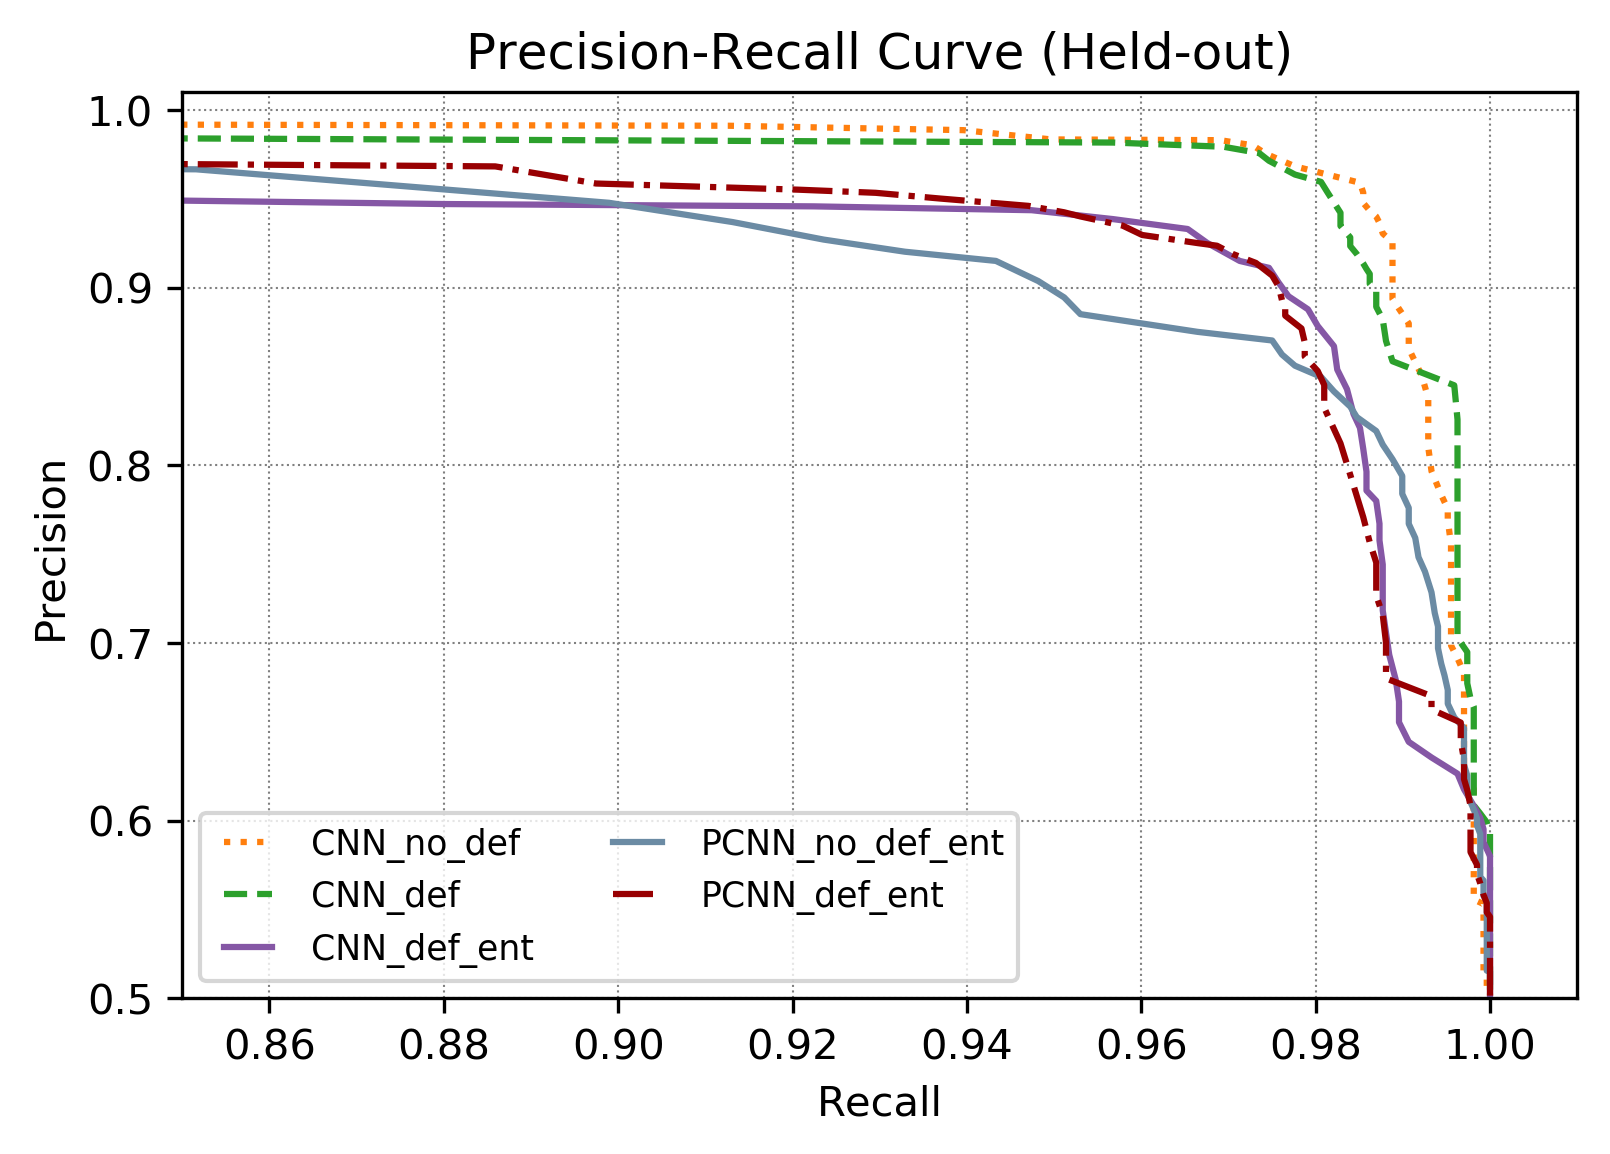

In [6]:
# Plot Precision-Recall curve
plt.clf()
plt.figure(dpi=300)
plt.plot(recall_base, precision_base, color='C1', ls=':', label='CNN_no_def')
plt.plot(recall, precision, color='C2', ls='--', label='CNN_def')
plt.plot(recall_ent, precision_ent, color='#8557a5', ls='-', label='CNN_def_ent')
plt.plot(recall_pcnn_nodef, precision_pcnn_nodef, color='#6b8ba4', ls='-', label='PCNN_no_def_ent')
plt.plot(recall_pcnn_ent, precision_pcnn_ent, color='#980002', ls='-.', label='PCNN_def_ent')
# plt.plot(recall_pcnn_att, precision_pcnn_att, color='C5', ls='-', label='PCNN_att')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Held-out)')
plt.grid(color='grey', lw=0.5, linestyle='dotted')
plt.xlim((0.85, 1.01))
plt.ylim((0.5, 1.01))
# plt.legend(loc='lower left')

plt.legend(loc='best', numpoints=2, ncol=2, fancybox = True,
           fontsize='small', labels=['CNN_no_def', 'CNN_def', 'CNN_def_ent', 'PCNN_no_def_ent', 'PCNN_def_ent'])
plt.show()

In [7]:
average_precision_score(label_base, label_scores_base), average_precision_score(label, label_scores), average_precision_score(label_ent, label_scores_ent), average_precision_score(label_pcnn_ent, label_scores_pcnn_ent), average_precision_score(label_pcnn_nodef, label_scores_pcnn_nodef), average_precision_score(label_pcnn_att, label_scores_pcnn_att)

(0.9887577463830108,
 0.989982351639393,
 0.9709075809686223,
 0.9782160211907155,
 0.9765762318342399,
 0.8957161651147074)

### Manual Evaluation

In [8]:
predict_g = pd.read_csv('predict/data_v7/gold/cnn_def/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)
predict_ent_g = pd.read_csv('predict/data_v7/gold/cnn_defent/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)
predict_base_g = pd.read_csv('predict/data_v7/gold/cnn_nodef/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)
predict_pcnn_ent_g = pd.read_csv('predict/data_v7/gold/pcnn_defent/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)
predict_pcnn_att_g = pd.read_csv('predict/data_v5/gold/pcnn_att/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)
predict_pcnn_nodef_g = pd.read_csv('predict/data_v7/gold/pcnn_nodef/predict_result.tsv', sep='\t', header=None, names=['kb_desc', 'oie_rel', 'dist', 'label'], quoting=csv.QUOTE_NONE)

In [9]:
# Calculate model performance
label_g = np.array(predict_g['label'], dtype=int)
label_scores_g = np.array(predict_g['dist'])
# precision_g, recall_g, thresholds_g = precision_recall_curve(label_g, label_scores_g, pos_label=0)
precision_g, recall_g, thresholds_g = get_prec_recall(label_g, label_scores_g)

label_ent_g = np.array(predict_ent_g['label'], dtype=int)
label_scores_ent_g = np.array(predict_ent_g['dist'])
# precision_ent_g, recall_ent_g, thresholds_ent_g = precision_recall_curve(label_ent_g, label_scores_ent_g, pos_label=0)
precision_ent_g, recall_ent_g, thresholds_ent_g = get_prec_recall(label_ent_g, label_scores_ent_g)

label_pcnn_ent_g = np.array(predict_pcnn_ent_g['label'], dtype=int)
label_scores_pcnn_ent_g = np.array(predict_pcnn_ent_g['dist'])
# precision_pcnn_ent_g, recall_pcnn_ent_g, thresholds_pcnn_ent_g = precision_recall_curve(label_pcnn_ent_g, label_scores_pcnn_ent_g, pos_label=0)
precision_pcnn_ent_g, recall_pcnn_ent_g, thresholds_pcnn_ent_g = get_prec_recall(label_pcnn_ent_g, label_scores_pcnn_ent_g)

label_pcnn_att_g = np.array(predict_pcnn_att_g['label'], dtype=int)
label_scores_pcnn_att_g = np.array(predict_pcnn_att_g['dist'])
# precision_pcnn_att_g, recall_pcnn_att_g, thresholds_pcnn_att_g = precision_recall_curve(label_pcnn_att_g, label_scores_pcnn_att_g, pos_label=0)
precision_pcnn_att_g, recall_pcnn_att_g, thresholds_pcnn_att_g = get_prec_recall(label_pcnn_att_g, label_scores_pcnn_att_g)

label_pcnn_nodef_g = np.array(predict_pcnn_nodef_g['label'], dtype=int)
label_scores_pcnn_nodef_g = np.array(predict_pcnn_nodef_g['dist'])
# precision_pcnn_nodef_g, recall_pcnn_nodef_g, thresholds_pcnn_nodef_g = precision_recall_curve(label_pcnn_nodef_g, label_scores_pcnn_nodef_g, pos_label=0)
precision_pcnn_nodef_g, recall_pcnn_nodef_g, thresholds_pcnn_nodef_g = get_prec_recall(label_pcnn_nodef_g, label_scores_pcnn_nodef_g)

# Calculate baseline performance
label_base_g = np.array(predict_base_g['label'], dtype=int)
label_scores_base_g = np.array(predict_base_g['dist'])
# precision_base_g, recall_base_g, thresholds_base_g = precision_recall_curve(label_base_g, label_scores_base_g, pos_label=0)
precision_base_g, recall_base_g, thresholds_base_g = get_prec_recall(label_base_g, label_scores_base_g)

<Figure size 432x288 with 0 Axes>

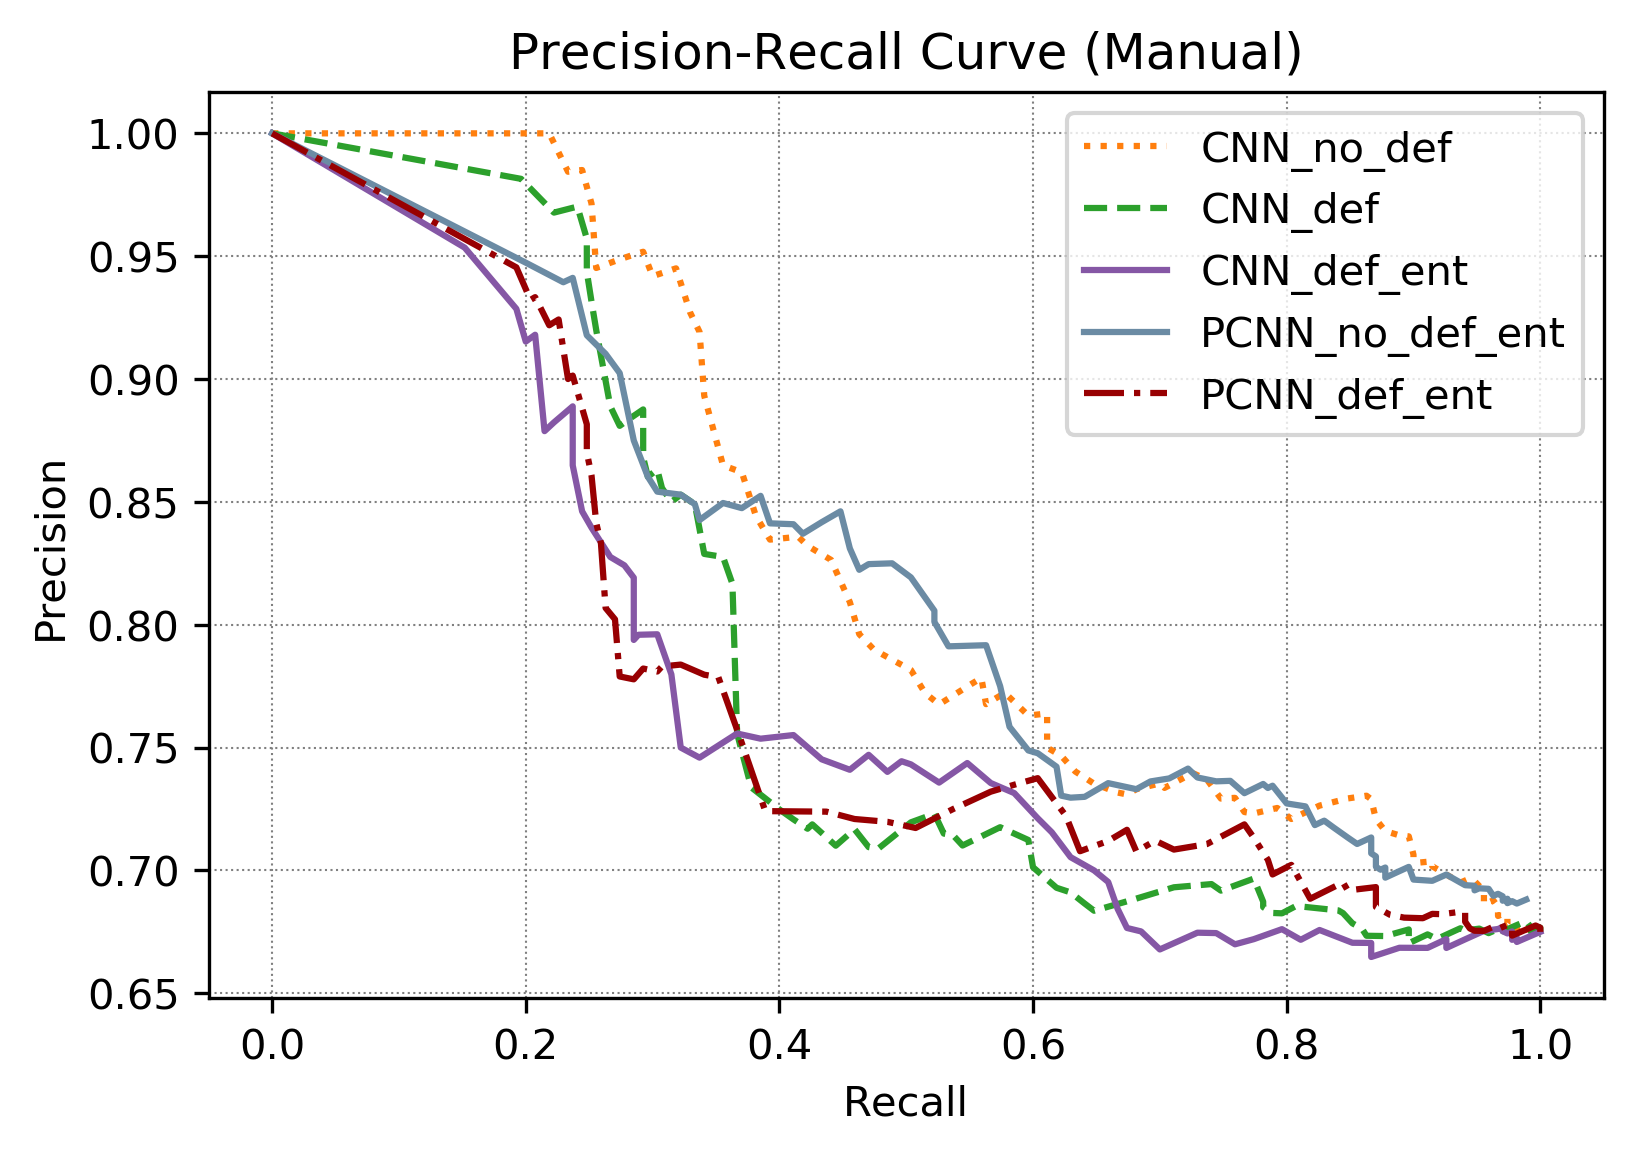

In [10]:
# Plot Precision-Recall curve
plt.clf()
plt.figure(dpi=300)
plt.plot(recall_base_g, precision_base_g, color='C1', ls=':', label='CNN_no_def')
plt.plot(recall_g, precision_g, color='C2', ls='--', label='CNN_def')
plt.plot(recall_ent_g, precision_ent_g, color='#8557a5', ls='-', label='CNN_def_ent')
plt.plot(recall_pcnn_nodef_g, precision_pcnn_nodef_g, color='#6b8ba4', ls='-', label='PCNN_no_def_ent')
plt.plot(recall_pcnn_ent_g, precision_pcnn_ent_g, color='#980002', ls='-.', label='PCNN_def_ent')
# plt.plot(recall_pcnn_att_g, precision_pcnn_att_g, lw=1, color='C5', ls='-', label='PCNN_att')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Manual)')
plt.grid(color='grey', lw=0.5, linestyle='dotted')
plt.legend(loc='best')
plt.show()

In [11]:
average_precision_score(label_base_g, label_scores_base_g), average_precision_score(label_g, label_scores_g), average_precision_score(label_ent_g, label_scores_ent_g), average_precision_score(label_pcnn_ent_g, label_scores_pcnn_ent_g), average_precision_score(label_pcnn_att_g, label_scores_pcnn_att_g)

(0.46148634523918264,
 0.3724373296818625,
 0.3498805841579787,
 0.39468912841679205,
 0.4034533346029481)

### Decision Threshold

In [12]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds, title):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    prec = precisions[:-1]
    rec = recalls[:-1]
    plt.figure(dpi=300)
    plt.grid(color='grey', lw=0.5, linestyle='dotted')
#     plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.title(title)
    plt.plot(thresholds, prec, color='#980002', ls='--', label="Precision")
    plt.plot(thresholds, rec, color='#6b8ba4', ls='-', label="Recall")
    plt.ylabel("Precision/Recall Score")
    plt.xlabel("Decision Threshold (Distance)")
#     plt.xlim((-0.5, 15.5))
    plt.legend(loc='lower left')

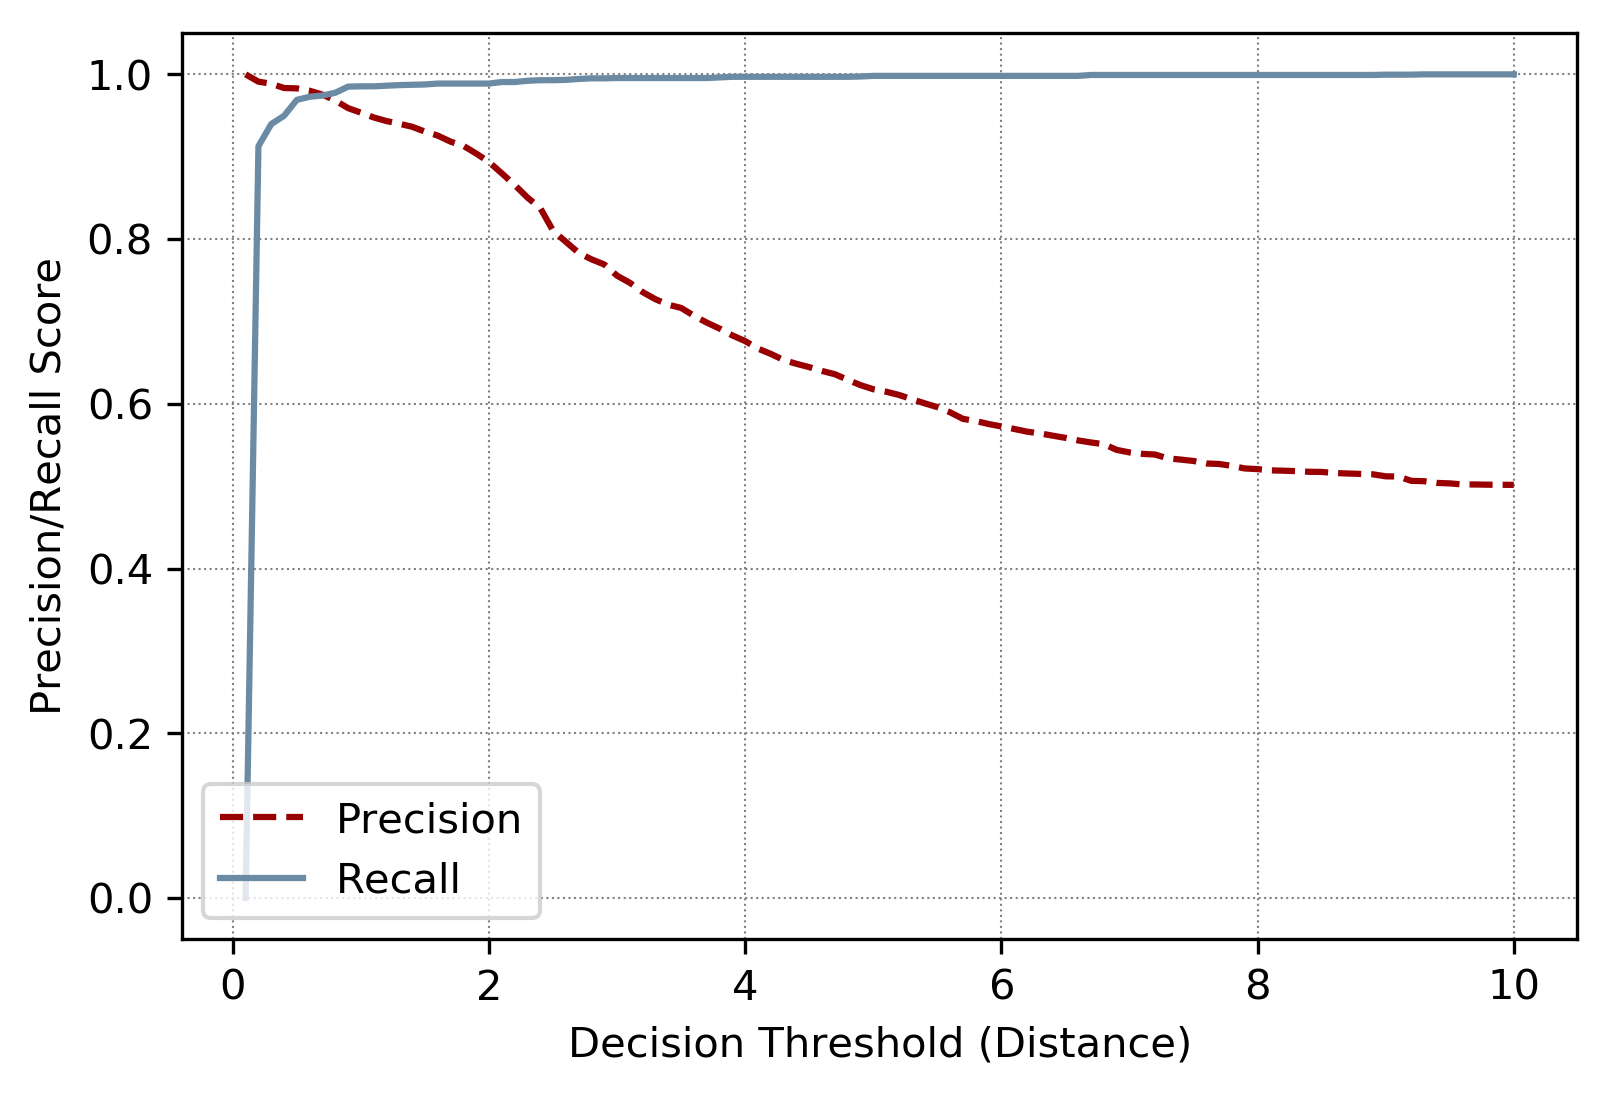

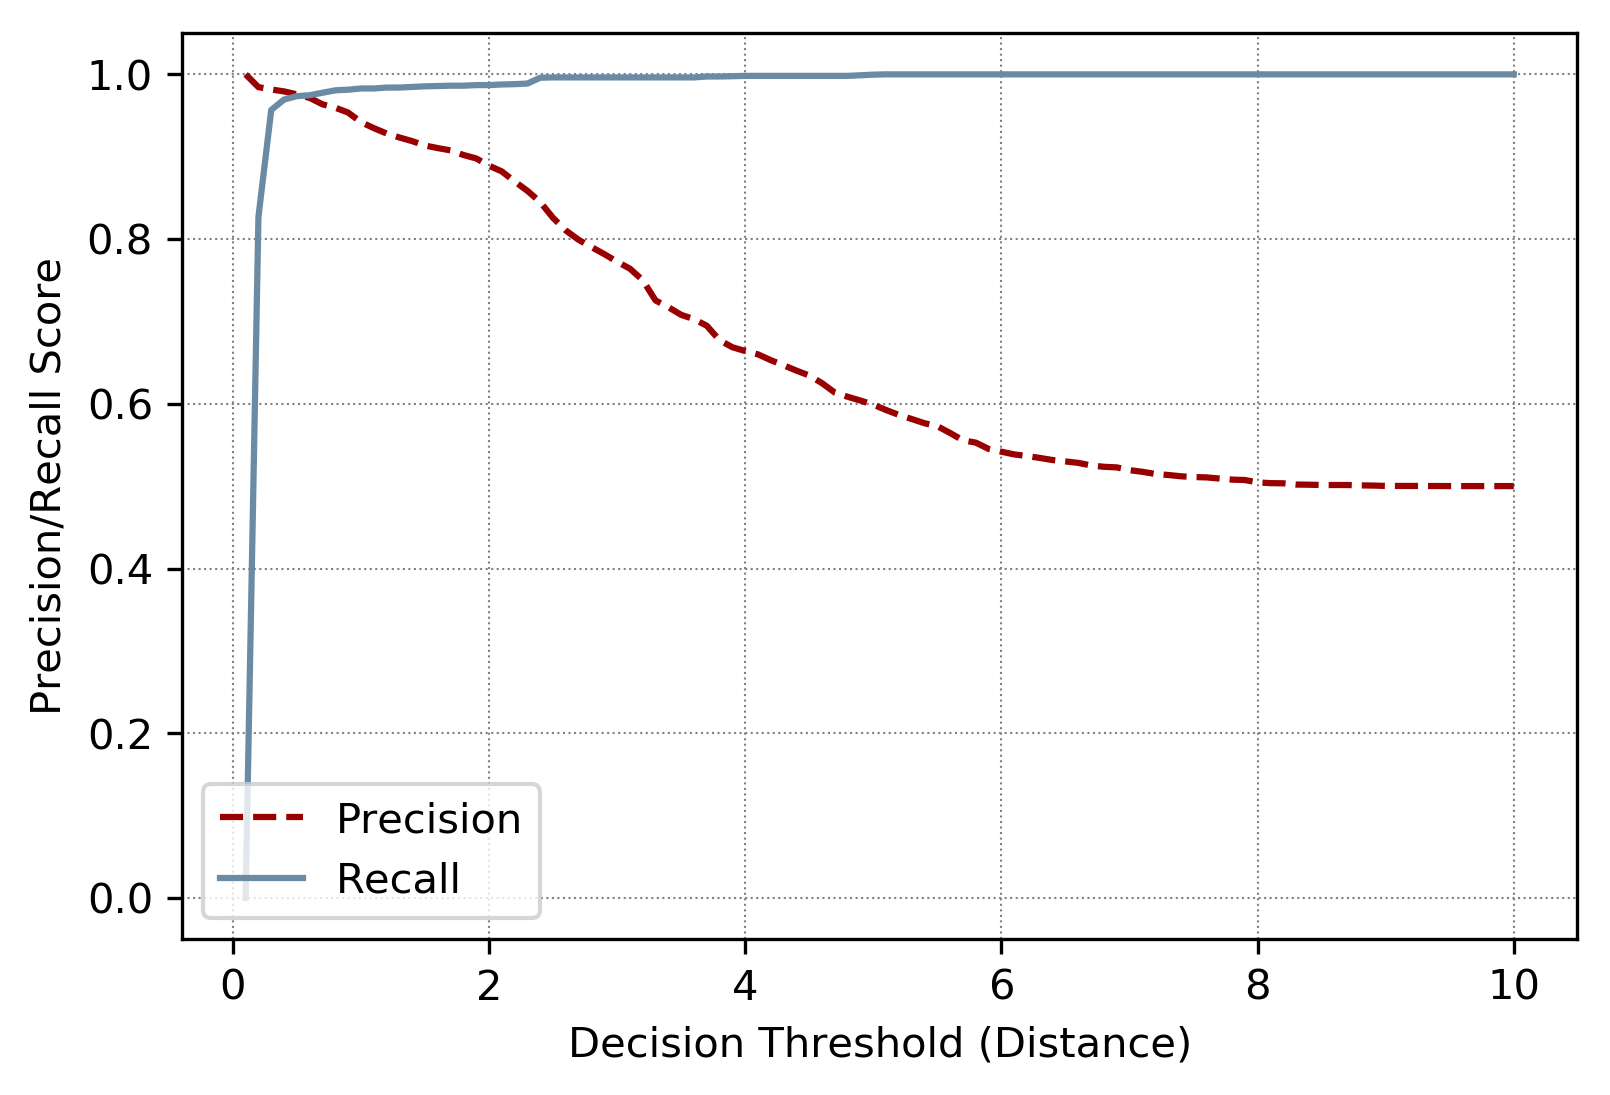

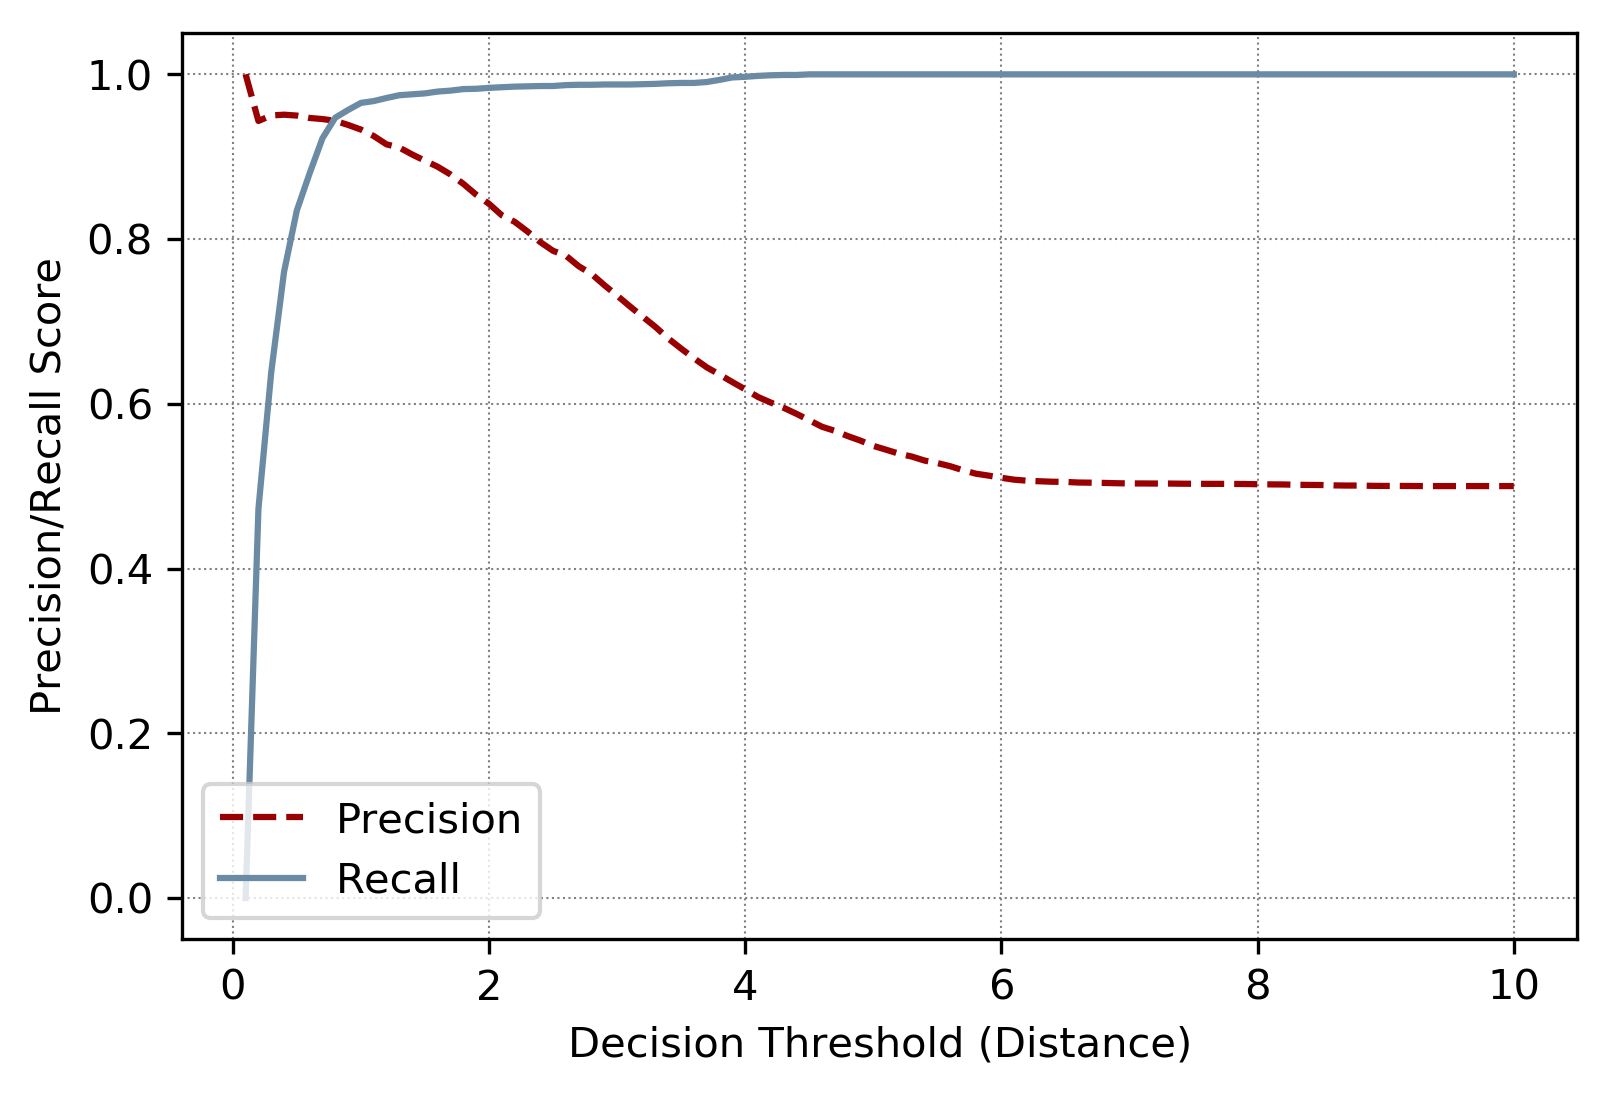

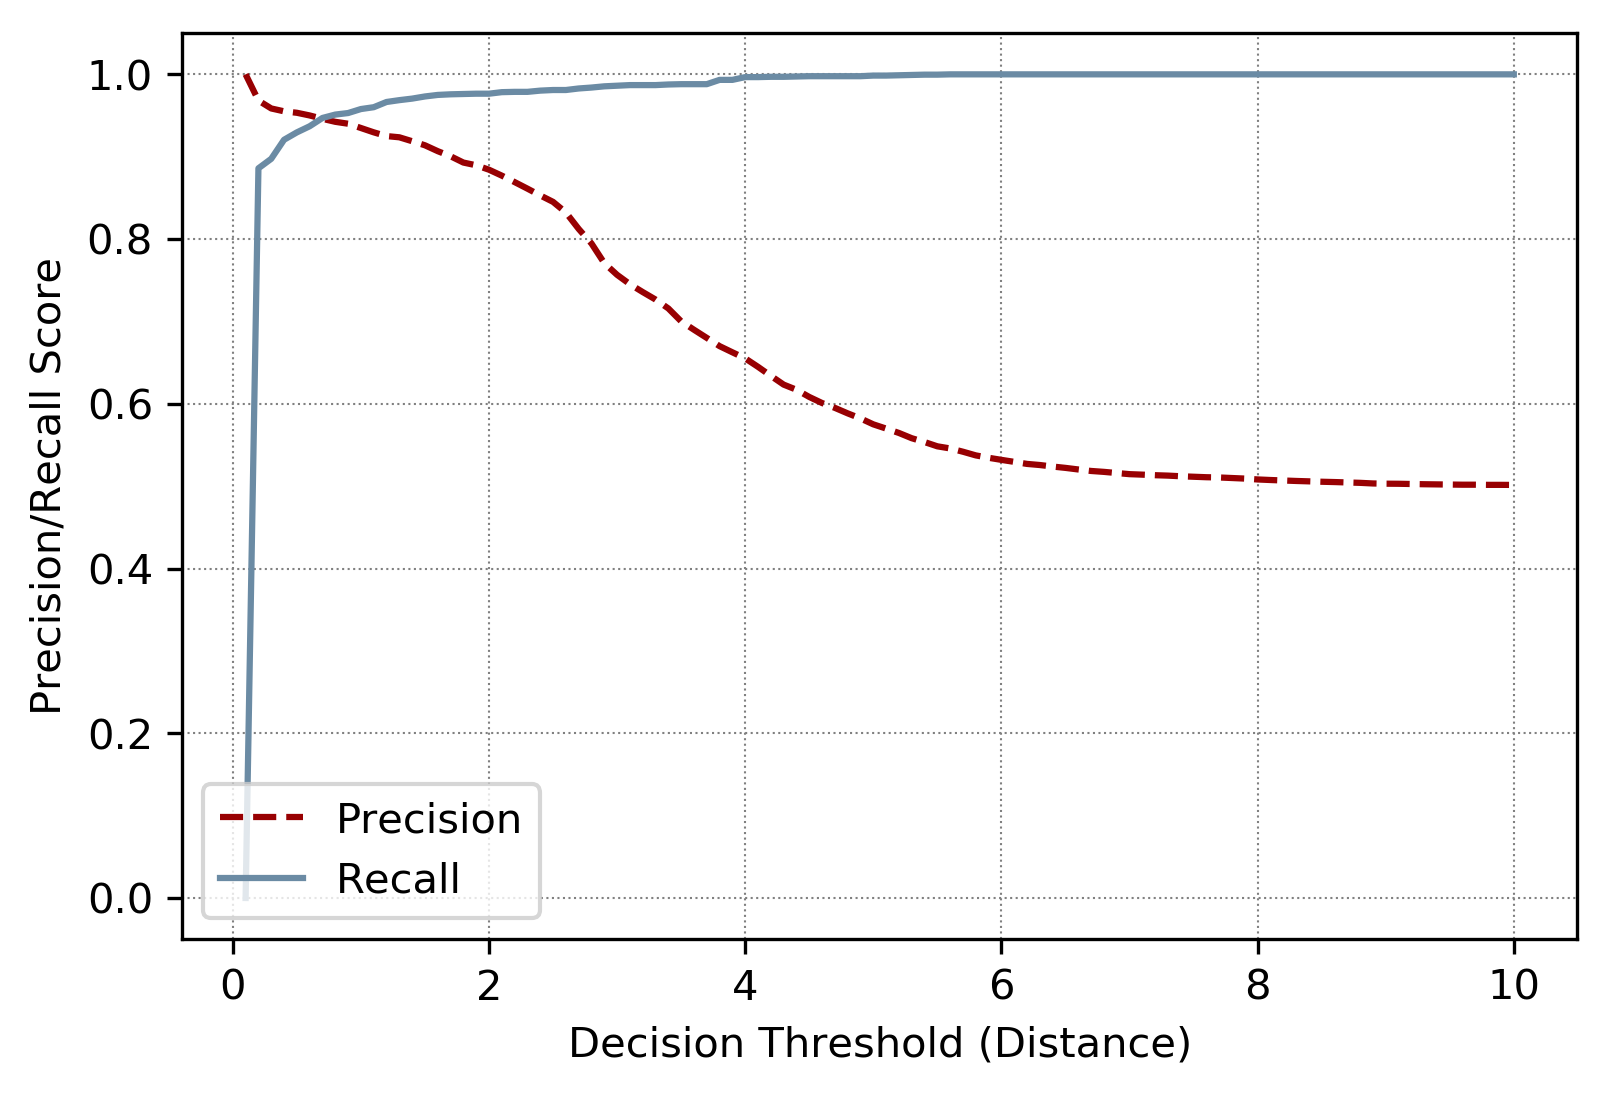

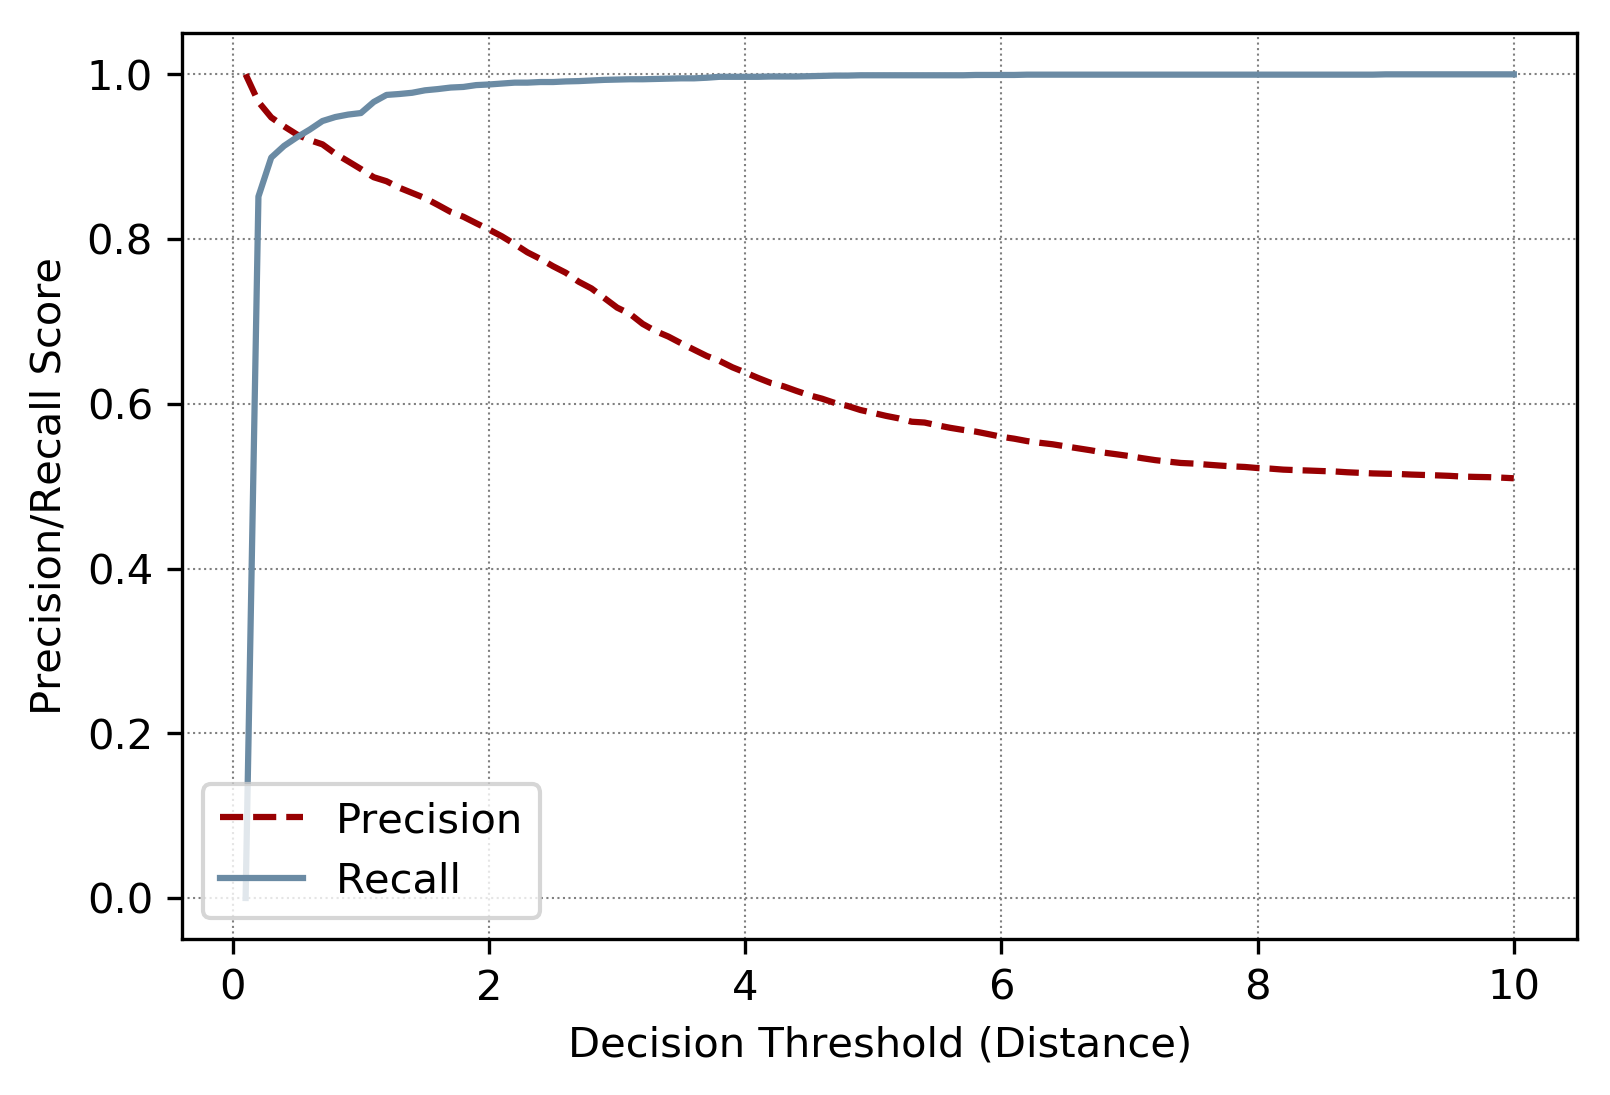

In [13]:
plot_precision_recall_vs_threshold(precision_base, recall_base, thresholds_base, '')
plot_precision_recall_vs_threshold(precision, recall, thresholds, '')
plot_precision_recall_vs_threshold(precision_ent, recall_ent, thresholds_ent, '')
plot_precision_recall_vs_threshold(precision_pcnn_ent, recall_pcnn_ent, thresholds_pcnn_ent, '')
plot_precision_recall_vs_threshold(precision_pcnn_nodef, recall_pcnn_nodef, thresholds_pcnn_nodef, '')

In [14]:
def get_threshold(precisions, recalls, thresholds):
    precisions = np.array(precisions)
    recalls = np.array(recalls)
    thresholds = np.array(thresholds)
    idx = np.argwhere(np.diff(np.sign(precisions[:-1] - recalls[:-1]))).flatten()
    return thresholds[idx][0]

In [15]:
get_threshold(precision_pcnn_ent, recall_pcnn_ent, thresholds_pcnn_ent)

0.6

### Reformat Alignment Result & Calculate Performance

In [16]:
data_header = ['e1_kb', 'rel_kb', 'rel_id', 'e2_kb', 'e1_oie', 'rel_oie', 'e2_oie',
               'e1_kb_id', 'e2_kb_id', 'e1_oie_id', 'e2_oie_id',
               'e1_oie_root', 'e2_oie_root', 'gold_label']
test_align = pd.read_csv('dataset/test_align_gold.tsv', sep='\t', header=None, names=data_header)

test_align['dist_cnn_no_def'] = predict_base_g['dist']
test_align['dist_cnn_def'] = predict_g['dist']
test_align['dist_cnn_def_ent'] = predict_ent_g['dist']
test_align['dist_pcnn_def_ent'] = predict_pcnn_ent_g['dist']
# test_align['dist_pcnn_att'] = predict_pcnn_att_g['dist']
test_align['dist_pcnn_no_def'] = predict_pcnn_nodef_g['dist']

# t_cnn_no_def = get_threshold(precision_base, recall_base, thresholds_base)
# t_cnn_def = get_threshold(precision, recall, thresholds)
# t_cnn_def_ent = get_threshold(precision_ent, recall_ent, thresholds_ent)
# t_pcnn_def_ent = get_threshold(precision_pcnn_ent, recall_pcnn_ent, thresholds_pcnn_ent)
# t_pcnn_att = get_threshold(precision_pcnn_att, recall_pcnn_att, thresholds_pcnn_att)
# t_pcnn_nodef = get_threshold(precision_pcnn_nodef, recall_pcnn_nodef, thresholds_pcnn_nodef)

t_cnn_no_def = get_threshold(precision_base_g, recall_base_g, thresholds_base_g)
t_cnn_def = get_threshold(precision_g, recall_g, thresholds_g)
t_cnn_def_ent = get_threshold(precision_ent_g, recall_ent_g, thresholds_ent_g)
t_pcnn_def_ent = get_threshold(precision_pcnn_ent_g, recall_pcnn_ent_g, thresholds_pcnn_ent_g)
# t_pcnn_att = get_threshold(precision_pcnn_att_g, recall_pcnn_att_g, thresholds_pcnn_att_g)
t_pcnn_nodef = get_threshold(precision_pcnn_nodef_g, recall_pcnn_nodef_g, thresholds_pcnn_nodef_g)

# t_cnn_no_def = 2
# t_cnn_def = 2
# t_cnn_def_ent = 2
# t_pcnn_def_ent = 2
# t_pcnn_att = 2

test_align['pred_cnn_no_def'] = [0 if d <= t_cnn_no_def else 1 for d in test_align['dist_cnn_no_def']]
test_align['pred_cnn_def'] = [0 if d <= t_cnn_def else 1 for d in test_align['dist_cnn_def']]
test_align['pred_cnn_def_ent'] = [0 if d <= t_cnn_def_ent else 1 for d in test_align['dist_cnn_def_ent']]
test_align['pred_pcnn_def_ent'] = [0 if d <= t_pcnn_def_ent else 1 for d in test_align['dist_pcnn_def_ent']]
# test_align['pred_pcnn_att'] = [0 if d <= t_pcnn_att else 1 for d in test_align['dist_pcnn_att']]
test_align['pred_pcnn_no_def'] = [0 if d <= t_pcnn_nodef else 1 for d in test_align['dist_pcnn_no_def']]
test_align['pred_base'] = 0

test_align = test_align[[
                'e1_kb', 'e1_kb_id', 'rel_kb', 'rel_id', 'e2_kb', 'e2_kb_id',
                'e1_oie', 'e1_oie_id', 'rel_oie', 'e2_oie', 'e2_oie_id',
                'dist_cnn_no_def', 'dist_cnn_def', 'dist_cnn_def_ent',  'dist_pcnn_no_def', 'dist_pcnn_def_ent',
                'pred_cnn_no_def', 'pred_cnn_def', 'pred_cnn_def_ent', 'pred_pcnn_no_def', 'pred_pcnn_def_ent',
                'pred_base', 'gold_label']]

In [17]:
eval_table = pd.DataFrame(index=['base', 'dutta', 'CESI', 'CNN_no_def', 'CNN_def', 'CNN_def_ent', 'PCNN_no_def', 'PCNN_def_ent'])
eval_table = eval_table.fillna(0) # with 0s rather than NaNs

#### Add base result to the eval_table

In [18]:
test_align

,e1_kb,e1_kb_id,rel_kb,rel_id,e2_kb,e2_kb_id,e1_oie,e1_oie_id,rel_oie,e2_oie,...,dist_cnn_def_ent,dist_pcnn_no_def,dist_pcnn_def_ent,pred_cnn_no_def,pred_cnn_def,pred_cnn_def_ent,pred_pcnn_no_def,pred_pcnn_def_ent,pred_base,gold_label
0,Cronus,Q44204,child,P40,Zeus,Q34201,Cronus,Q44204,' son is,Zeus,...,0.012705,0.057002,0.014711,0,0,0,0,0,0,0
1,A Royal Christmas,Q18611433,distributor,P750,Hallmark Channel,Q15501374,Royal Christmas,Q18611433,aired on,Hallmark Channel,...,2.184036,3.747168,3.790220,0,0,0,0,0,0,0
2,Mystic Ark,Q6948921,developer,P178,Produce,Q7247680,Mystic Ark,Q6948921,also developed by,Produce,...,0.072432,0.007324,0.000753,0,0,0,0,0,0,0
3,Nisqually River,Q829444,mouth of the watercourse,P403,Puget Sound,Q604141,Nisqually River,Q829444,also lived throughout,Puget Sound,...,0.945600,4.306264,3.510344,0,0,0,0,0,0,1
4,Jonah Sithole,Q6271933,instrument,P1303,guitar,Q6607,Jonah Sithole,Q6271933,also played,guitar,...,2.778780,2.503421,3.421206,0,1,0,0,0,0,0
5,Jane Menelaus,Q2063601,spouse,P26,Geoffrey Rush,Q166272,Jane Menelaus,Q2063601,appeared with,Geoffrey Rush,...,3.251304,4.224133,4.852665,1,0,0,0,1,0,1
6,Diddy Kong,Q10904385,present in work,P1441,Donkey Kong Country,Q518987,Diddy Kong,Q10904385,appearing in,Donkey Kong Country,...,5.590956,1.777296,3.401026,0,1,1,0,0,0,0
7,Deadpool,Q1631090,member of,P463,X-Force,Q938034,Deadpool,Q1631090,appearing in,X-Force,...,4.695960,3.579079,2.793315,0,0,1,0,0,0,0
8,Obi-Wan Kenobi,Q51740,present in work,P1441,Star Wars,Q17738,Obi-Wan Kenobi,Q51740,appears extensively in,Star Wars,...,1.954353,0.181088,1.809671,0,0,0,0,0,0,0
9,Thirteen Senses,Q1893668,location of formation,P740,Penzance,Q208209,Thirteen Senses,Q1893668,are band from,Penzance,...,0.098525,0.053445,0.003989,0,0,0,0,0,0,0


In [19]:
rel_aliases = pd.read_csv('dataset/relation_desc_aliases.tsv', sep='\t', header=None, names=['id', 'rel', 'desc', 'len_desc', 'aliases'])
aliases_dict = {}
for i in range(len(rel_aliases)):
    aliases = rel_aliases['aliases'][i]
    if isinstance(aliases, str):
        aliases_dict[rel_aliases['id'][i]] = aliases.split(', ')
    else:
        aliases_dict[rel_aliases['id'][i]] = [rel_aliases['rel'][i]]

In [20]:
def handle_same_entities(rel_kb_id, rel_oie):
    aliases = aliases_dict[rel_kb_id]
    for alias in aliases:
        if alias == rel_oie or (rel_oie in alias) or (alias in rel_oie):
            return 0
    return 1

In [21]:
for i in range(len(test_align)):
    e1_kb_id = test_align['e1_kb_id'][i]
    e2_kb_id = test_align['e2_kb_id'][i]
    e1_oie_id = test_align['e1_oie_id'][i]
    e2_oie_id = test_align['e2_oie_id'][i]
    e1_kb = test_align['e1_kb'][i]
    e2_kb = test_align['e2_kb'][i]
    e1_oie = test_align['e1_oie'][i]
    e2_oie = test_align['e2_oie'][i]
    rel_kb_id = test_align['rel_id'][i]
    rel_oie = test_align['rel_oie'][i]
    if (e1_oie_id == e1_kb_id or e1_kb == e1_oie) and (e2_oie_id == e2_kb_id or e2_kb == e2_oie):
        # same class (similar relation): 0
        test_align.loc[i, 'pred_base'] = handle_same_entities(rel_kb_id, rel_oie)
    else:
        test_align.loc[i, 'pred_base'] = 1

In [22]:
gold = list(test_align['gold_label'])
pred_base = list(test_align['pred_base'])
index = 'base'
eval_table.at[index, 'acc'] = accuracy_score(gold, pred_base)
eval_table.at[index, 'prec'] = precision_score(gold, pred_base, pos_label=0, average='binary')
eval_table.at[index, 'rec'] = recall_score(gold, pred_base, pos_label=0, average='binary')
eval_table.at[index, 'f1'] = f1_score(gold, pred_base, pos_label=0, average='binary')

In [23]:
pred_base.count(1)

337

#### Add dutta result to the eval_table

In [24]:
with open('dutta/align_v6.p', 'rb') as fp:
    dutta_dict = pickle.load(fp)

In [25]:
pred_dutta = []
for i in range(len(test_align)):
    rel_kb = test_align['rel_id'][i]
    rel_oie = test_align['rel_oie'][i]
    pred_list = dutta_dict[rel_kb]
    if rel_oie in pred_list:
        pred_dutta.append(0)
    else:
        pred_dutta.append(1)

In [26]:
pred_dutta.count(0)

175

In [27]:
index = 'dutta'
eval_table.at[index, 'acc'] = accuracy_score(gold, pred_dutta)
eval_table.at[index, 'prec'] = precision_score(gold, pred_dutta, pos_label=0, average='binary')
eval_table.at[index, 'rec'] = recall_score(gold, pred_dutta, pos_label=0, average='binary')
eval_table.at[index, 'f1'] = f1_score(gold, pred_dutta, pos_label=0, average='binary')

#### Add cesi result to the eval_table

In [28]:
import json

In [29]:
with open('predict/cesi/rel_to_cluster_id.json') as json_data:
    rel_to_cluster_id = json.load(json_data)

In [30]:
cesi_predict = []
for i in range(len(test_align)):
    rel_kb = test_align['rel_kb'][i]
    rel_oie = test_align['rel_oie'][i]
    id_kb = rel_to_cluster_id.get(rel_kb, None)
    id_oie = rel_to_cluster_id.get(rel_oie, None)
    if id_kb == id_oie:
        cesi_predict.append(0)
    else:
        cesi_predict.append(1)

In [31]:
gold = list(test_align['gold_label'])
index = 'CESI'
eval_table.at[index, 'acc'] = accuracy_score(gold, cesi_predict)
eval_table.at[index, 'prec'] = precision_score(gold, cesi_predict, pos_label=0, average='binary')
eval_table.at[index, 'rec'] = recall_score(gold, cesi_predict, pos_label=0, average='binary')
eval_table.at[index, 'f1'] = f1_score(gold, cesi_predict, pos_label=0, average='binary')

#### Add model result to the eval_table

In [32]:
indexes = [
    ('dist_cnn_no_def', 'pred_cnn_no_def', 'CNN_no_def'),
    ('dist_cnn_def', 'pred_cnn_def', 'CNN_def'),
    ('dist_cnn_def_ent', 'pred_cnn_def_ent', 'CNN_def_ent'),
    ('dist_pcnn_no_def', 'pred_pcnn_no_def', 'PCNN_no_def'),
    ('dist_pcnn_def_ent', 'pred_pcnn_def_ent', 'PCNN_def_ent'),
]

for i in indexes:
    score_label = i[0]
    pred_label = i[1]
    index = i[2]

    gold = list(test_align['gold_label'])
    pred = list(test_align[pred_label])
    score = list(test_align[score_label])
    
    eval_table.at[index, 'acc'] = accuracy_score(gold, pred)
    eval_table.at[index, 'prec'] = precision_score(gold, pred, pos_label=0, average='binary')
    eval_table.at[index, 'rec'] = recall_score(gold, pred, pos_label=0, average='binary')
    eval_table.at[index, 'f1'] = f1_score(gold, pred, pos_label=0, average='binary')
    
#     fpr, tpr, thresholds = roc_curve(gold, score, pos_label=0)
#     eval_table.at[index, 'auc'] = auc(fpr, tpr)

In [33]:
eval_table

,acc,prec,rec,f1
base,0.4775,0.984127,0.229630,0.372372
dutta,0.5475,0.754286,0.488889,0.593258
CESI,0.3700,0.950000,0.070370,0.131034
CNN_no_def,0.6450,0.737037,0.737037,0.737037
CNN_def,0.5925,0.693141,0.711111,0.702011
CNN_def_ent,0.5650,0.675182,0.685185,0.680147
PCNN_no_def,0.6475,0.736264,0.744444,0.740331
PCNN_def_ent,0.6075,0.708487,0.711111,0.709797


In [34]:
test_align.to_csv('predict/data_v7/gold_result.tsv', index=False, sep='\t')

In [35]:
cesi_predict.count(1)

380

In [36]:
temp_cesi = 1 - np.array((cesi_predict))
print(temp_cesi)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [37]:
test_align['pred_dutta'] = pred_dutta
test_align['pred_cesi'] = cesi_predict

In [38]:
test_align.to_csv('predict/data_v7/gold_result.tsv', index=False, sep='\t')

In [39]:
list(test_align['pred_pcnn_no_def']).count(1), list(test_align['gold_label']).count(1)

(127, 130)

In [40]:
t_cnn_no_def, t_cnn_def, t_cnn_def_ent, t_pcnn_def_ent, t_pcnn_nodef

(4.8, 4.6, 4.0, 4.2, 4.4)

In [41]:
pick_idx_pos = [0, 23, 53, 56, 31, 67]
pick_idx_neg = [280, 281, 395, 28, 285, 170]

In [42]:
test_align.loc[pick_idx_pos]

,e1_kb,e1_kb_id,rel_kb,rel_id,e2_kb,e2_kb_id,e1_oie,e1_oie_id,rel_oie,e2_oie,...,dist_pcnn_def_ent,pred_cnn_no_def,pred_cnn_def,pred_cnn_def_ent,pred_pcnn_no_def,pred_pcnn_def_ent,pred_base,gold_label,pred_dutta,pred_cesi
0,Cronus,Q44204,child,P40,Zeus,Q34201,Cronus,Q44204,' son is,Zeus,...,0.014711,0,0,0,0,0,0,0,1,1
23,Tokyo File 212,Q7813876,filming location,P915,Japan,Q17,Tokyo File 212,Q7813876,be shot entirely in,Japan,...,4.316468,0,0,1,0,1,1,0,1,1
53,Munavvar Kalantarli,Q195427,place of death,P20,Baku,Q9248,Munavvar Kalantarli,Q195427,died in,Baku,...,0.011471,0,0,0,0,0,0,0,0,1
56,James Louis Sobieski,Q507964,cause of death,P509,stroke,Q12202,James Louis Sobieski,Q507964,died of,stroke,...,3.781357,1,1,1,1,0,1,0,0,1
31,Paperman,Q2252695,nominated for,P1411,Academy Award for Best Animated Short Film,Q917808,Paperman,Q2252695,being nominated for,Academy Award for Animated Short Film,...,4.373669,0,0,0,0,1,1,0,1,0
67,Denmark,Q35,member of,P463,NATO,Q7184,Denmark,Q35,founding member of,NATO,...,0.657280,0,0,0,0,0,0,0,1,0


In [43]:
test_align.loc[pick_idx_neg]

,e1_kb,e1_kb_id,rel_kb,rel_id,e2_kb,e2_kb_id,e1_oie,e1_oie_id,rel_oie,e2_oie,...,dist_pcnn_def_ent,pred_cnn_no_def,pred_cnn_def,pred_cnn_def_ent,pred_pcnn_no_def,pred_pcnn_def_ent,pred_base,gold_label,pred_dutta,pred_cesi
280,Franklin D'Olier,Q5491430,place of burial,P119,New Jersey,Q1408,Franklin D'Olier,Q5491430,was born in,New Jersey,...,2.775894,0,0,0,0,0,1,1,0,1
281,William Tailer,Q8019153,place of death,P20,Dorchester,Q1024037,William Tailer,Q8019153,was born in,Dorchester,...,0.003062,1,0,0,0,0,1,1,0,1
395,Tweetie Pie,Q1144147,nominated for,P1411,Academy Award for Best Animated Short Film,Q917808,Tweetie Pie,Q1144147,won,Academy Award for Animated Short Film,...,0.010243,0,0,0,0,0,1,1,0,1
28,Jeconiah,Q319049,place of death,P20,Babylon,Q5684,Jeconiah,Q319049,began trip to,Babylon,...,5.331262,1,0,0,1,1,1,1,1,1
285,Stefanie SchÃ¼ler-Springorum,Q2338281,work location,P937,Hamburg,Q1055,Stefanie SchÃ¼ler-Springorum,Q2338281,was born in,Hamburg,...,7.650105,1,1,1,1,1,1,1,0,1
170,Aeneas,Q82732,father,P22,Anchises,Q211953,Aeneas,Q82732,leave,Anchises,...,3.620397,1,0,0,0,0,1,1,1,1


### Visualize Embedding

In [ ]:
rel_vector = pd.read_csv('predict/data_v5/pcnn_defent/rel_embed_vector.tsv', sep='\t', header=None, names=['el1', 'el2'])
data_header = ['e1_kb', 'rel_kb', 'rel_id', 'e2_kb', 'e1_oie', 'rel_oie', 'e2_oie',
               'e1_kb_id', 'e2_kb_id', 'e1_oie_id', 'e2_oie_id',
               'e1_oie_root', 'e2_oie_root', 'label']
test_align = pd.read_csv('dataset/test_align_all_balanced.tsv', sep='\t', header=None, names=data_header)
rel_label = test_align['rel_oie']
rel_label_unique = pd.read_csv('predict/data_v5/pcnn_defent/rel_embed_label.tsv', sep='\t', header=None, names=['label'])
rel_label_unique = rel_label_unique.drop_duplicates()

In [ ]:
rel_label[0]

In [ ]:
vector_x = []
vector_y = []
for index, row in rel_label_unique.iterrows():
    vector_x.append(rel_vector['el1'][index])
    vector_y.append(rel_vector['el2'][index])

In [ ]:
fig, ax = plt.subplots(dpi=300)
# plt.ylim((-1.75, 2.25))
# plt.xlim((-2.25, 1.75))
ax.scatter(vector_x, vector_y)

In [ ]:
vector_x = []
vector_y = []
label = []
observed_label = ['was daughter of', 'was son of',
                  #'are languages of', 'are official languages of', 'is spoken in',
                  #'is nation in', 'is state in', 'is country in'
                 ]
for index, row in rel_label_unique.iterrows():
    label_txt = rel_label[index]
    if label_txt in observed_label:
#         label.append(label_txt)
        label.append('')
        vector_x.append(rel_vector['el1'][index])
        vector_y.append(rel_vector['el2'][index])

In [ ]:
fig, ax = plt.subplots(dpi=300)
ax.scatter(vector_x, vector_y)
plt.ylim((-3.4, 4.25))
plt.xlim((-5.2, 8.8))

for i, txt in enumerate(label):
    ax.annotate(txt, (vector_x[i], vector_y[i]))

### Relation Coverage

In [ ]:
# rel_predict = pd.read_csv('predict/oie_def_ent_root/predict_result_sort.tsv', sep='\t', header=None, names=['rel_kb', 'rel_oie', 'label'])
rel_predict_0 = predict_pcnn_ent[predict_pcnn_ent.label != 1]
rel_predict_1 = predict_pcnn_ent[predict_pcnn_ent.label != 0]
rel_oie_0 = set(rel_predict_0['oie_rel'])
rel_oie_1 = set(rel_predict_1['oie_rel'])

In [ ]:
rel_oie_0

In [ ]:
uncovered_rel = set([x for x in rel_oie_1 if x not in rel_oie_0])

In [ ]:
uncovered_rel

In [ ]:
len(uncovered_rel), len(set(predict_pcnn_ent['oie_rel']))

In [ ]:
with open('predict/oie_def/uncovered_oie_rel.txt', 'w') as f:
    for item in uncovered_rel:
        f.write("%s\n" % item)